## Google Playstore Data Cleaning - Utkarsh Gaikwad

Dataset Source : [https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv](https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv)

## Read the dataset 

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
df.shape

(10841, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.nunique().sort_values()

Type                 3
Content Rating       6
Installs            22
Android Ver         33
Category            34
Rating              40
Price               93
Genres             120
Size               462
Last Updated      1378
Current Ver       2832
Reviews           6002
App               9660
dtype: int64

In [5]:
# Summary of Dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
# Missing Values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Insights and observation 
Dataset has missing values

In [7]:
# Check values in numeric values 
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [8]:
df['Reviews'].str.isnumeric().sum()

10840

In [9]:
len(df)

10841

In [10]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.loc[10472,'Reviews']=str(int(3e6))

In [12]:
df['Reviews'] = df['Reviews'].astype(int)

In [13]:
df['Reviews'].dtype

dtype('int64')

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
df['Size'].isna().sum()

0

In [17]:
df[df['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [18]:
# Convert all units into k
import numpy as np
df['Size'] = df['Size'].str.replace('M','000')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)
df['Size'] = df['Size'].replace('1,000+','1')

In [19]:
df['Size'] = df['Size'].astype(float)

In [20]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [22]:
chars_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']
for items in chars_to_remove:
    for col in columns_to_clean:
        df[col] = df[col].str.replace(items,'')       

/tmp/ipykernel_96/1285349369.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace(items,'')


In [23]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [24]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [25]:
df['Installs'] = df['Installs'].replace('Free',np.nan)
df['Price'] = df['Price'].replace('Everyone',np.nan)

In [26]:
df['Installs'] = df['Installs'].astype(float)
df['Price'] = df['Price'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [28]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [29]:
df = df.drop(index=10472,axis=0)

In [30]:
df['Last Updated']= pd.to_datetime(df['Last Updated'])

In [31]:
df['day'] = df['Last Updated'].dt.day
df['month'] = df['Last Updated'].dt.month
df['year'] = df['Last Updated'].dt.year

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  day             10840 non-null  int64         
 14  month           10840 non-null  int64         
 15  ye

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [34]:
df.to_csv('data/google_cleaned.csv',index=False)

# EDA 

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [36]:
df[['App']].duplicated().sum()

1181

In [37]:
df[df[['App']].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [38]:
df = df.drop_duplicates(subset=['App'],keep='first')

In [39]:
df.shape

(9659, 16)

# Explore data

In [40]:
num_cols = list(df.select_dtypes(exclude='object').columns)
cat_cols = list(df.select_dtypes(include='object').columns)

In [41]:
num_cols

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'day',
 'month',
 'year']

In [42]:
cat_cols

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [43]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,8196.0,4.173243e+00,5.366247e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,9659.0,2.165926e+05,1.831320e+06,0.0,25.0,967.0,29401.0,7.815831e+07
Size,8432.0,1.837220e+04,2.329224e+04,1.0,5.3,12000.0,28000.0,1.000000e+05
Installs,9659.0,7.777507e+06,5.375828e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Price,9659.0,1.099299e+00,1.685215e+01,0.0,0.0,0.0,0.0,4.000000e+02
day,9659.0,1.563298e+01,9.431017e+00,1.0,7.0,16.0,24.0,3.100000e+01
month,9659.0,6.364013e+00,2.659610e+00,1.0,5.0,7.0,8.0,1.200000e+01
year,9659.0,2.017346e+03,1.137600e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [44]:
df[cat_cols].describe().T

,count,unique,top,freq
App,9659,9659,Photo Editor & Candy Camera & Grid & ScrapBook,1
Category,9659,33,FAMILY,1832
Type,9658,2,Free,8902
Content Rating,9659,6,Everyone,7903
Genres,9659,118,Tools,826
Current Ver,9651,2817,Varies with device,1055
Android Ver,9657,33,4.1 and up,2202


In [45]:
for i in cat_cols:
    print(f'Feature Name: {i}')
    print(df[i].value_counts(normalize=True)*100)
    print('\n'+'='*80+'\n')

Feature Name: App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64


Feature Name: Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINA

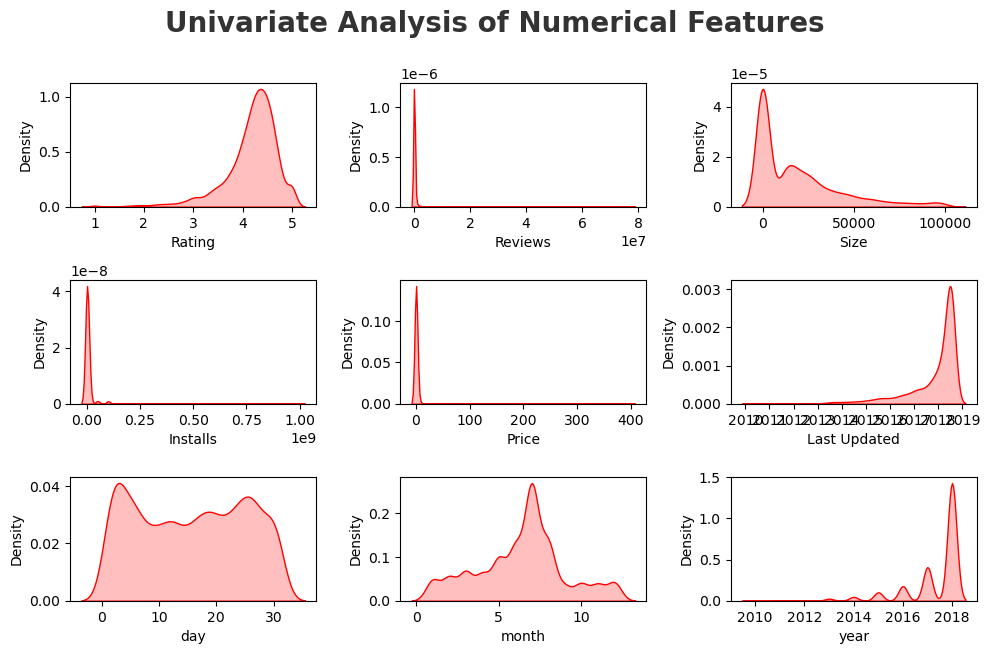

In [46]:
# Univariate Analysis of Numeric Variables
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1.)
counter = 1
for i in num_cols:
    plt.subplot(5,3,counter)
    sns.kdeplot(x=df[i] , shade=True, color='r')
    plt.xlabel(i)
    plt.tight_layout()
    counter = counter + 1
plt.show()   

# Observation
1. Rating and Year is left skewed
2. Price and installs is right skewed

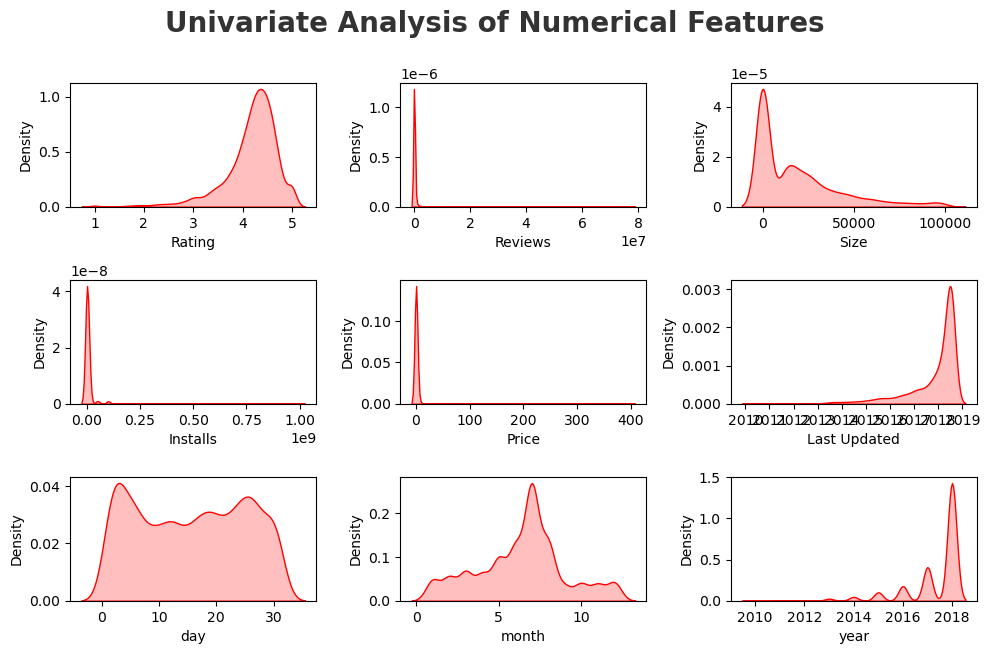

In [47]:
# Univariate Analysis of Categorical Variables
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1.)
counter = 1
for i in num_cols:
    plt.subplot(5,3,counter)
    sns.kdeplot(x=df[i] , shade=True, color='r')
    plt.xlabel(i)
    plt.tight_layout()
    counter = counter + 1
plt.show()   

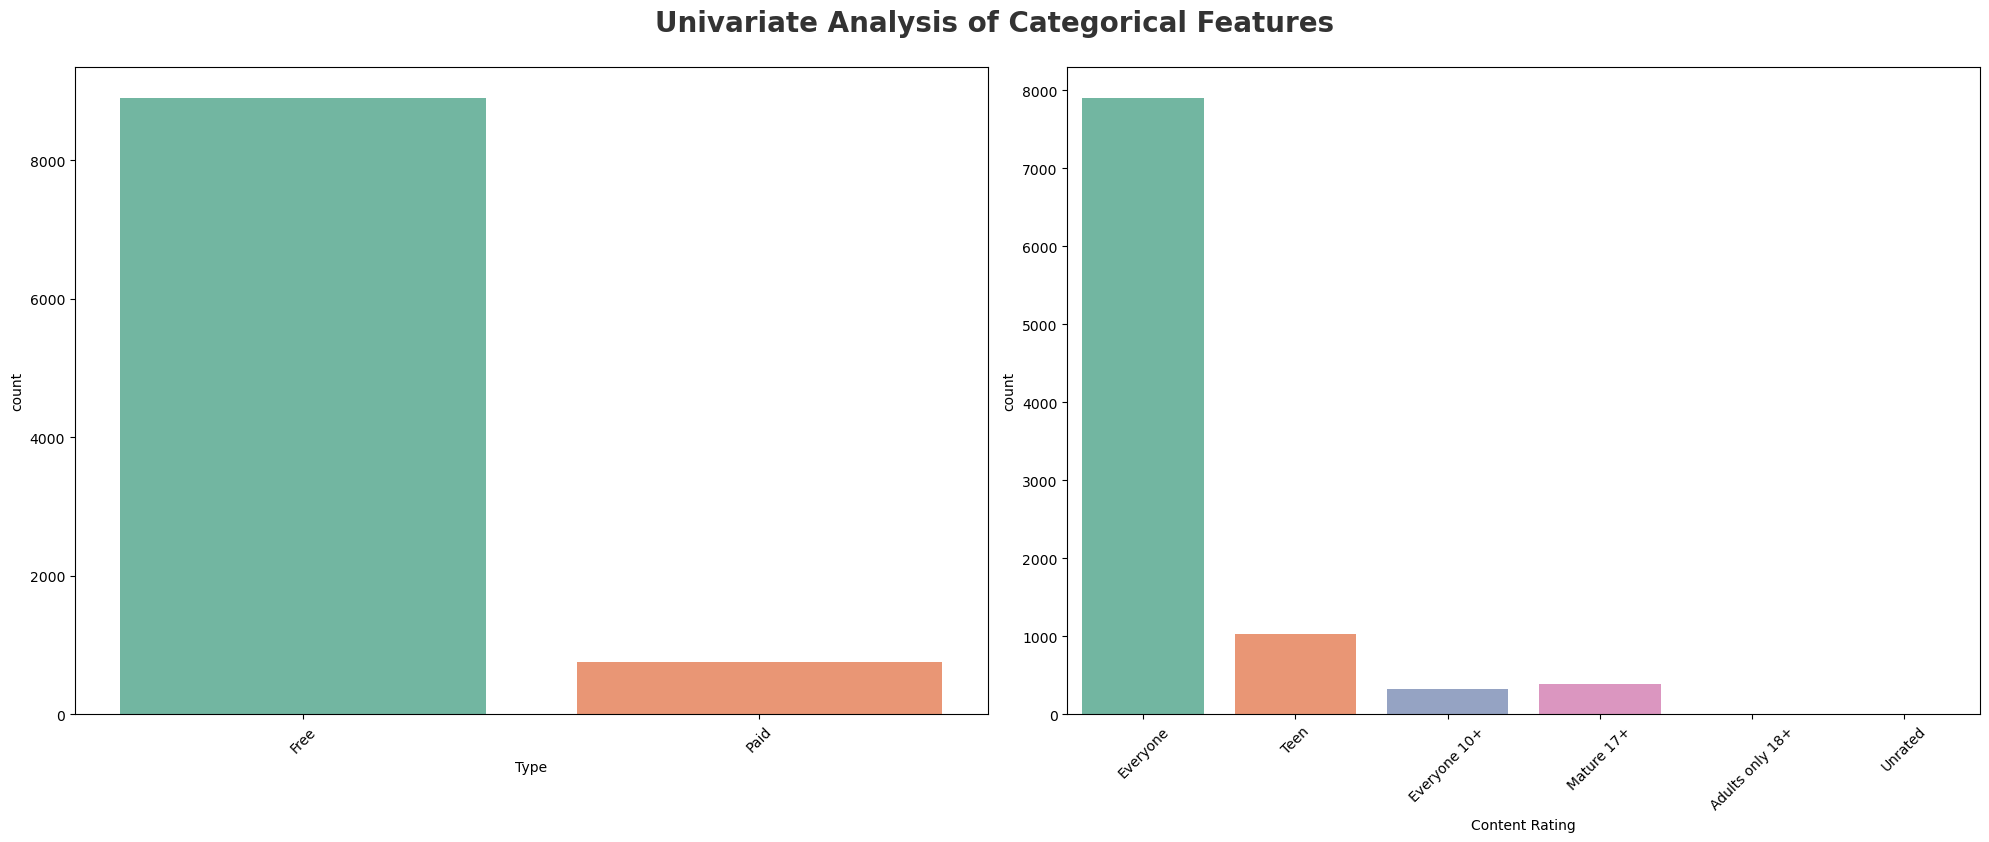

In [48]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

<AxesSubplot: ylabel='Category'>

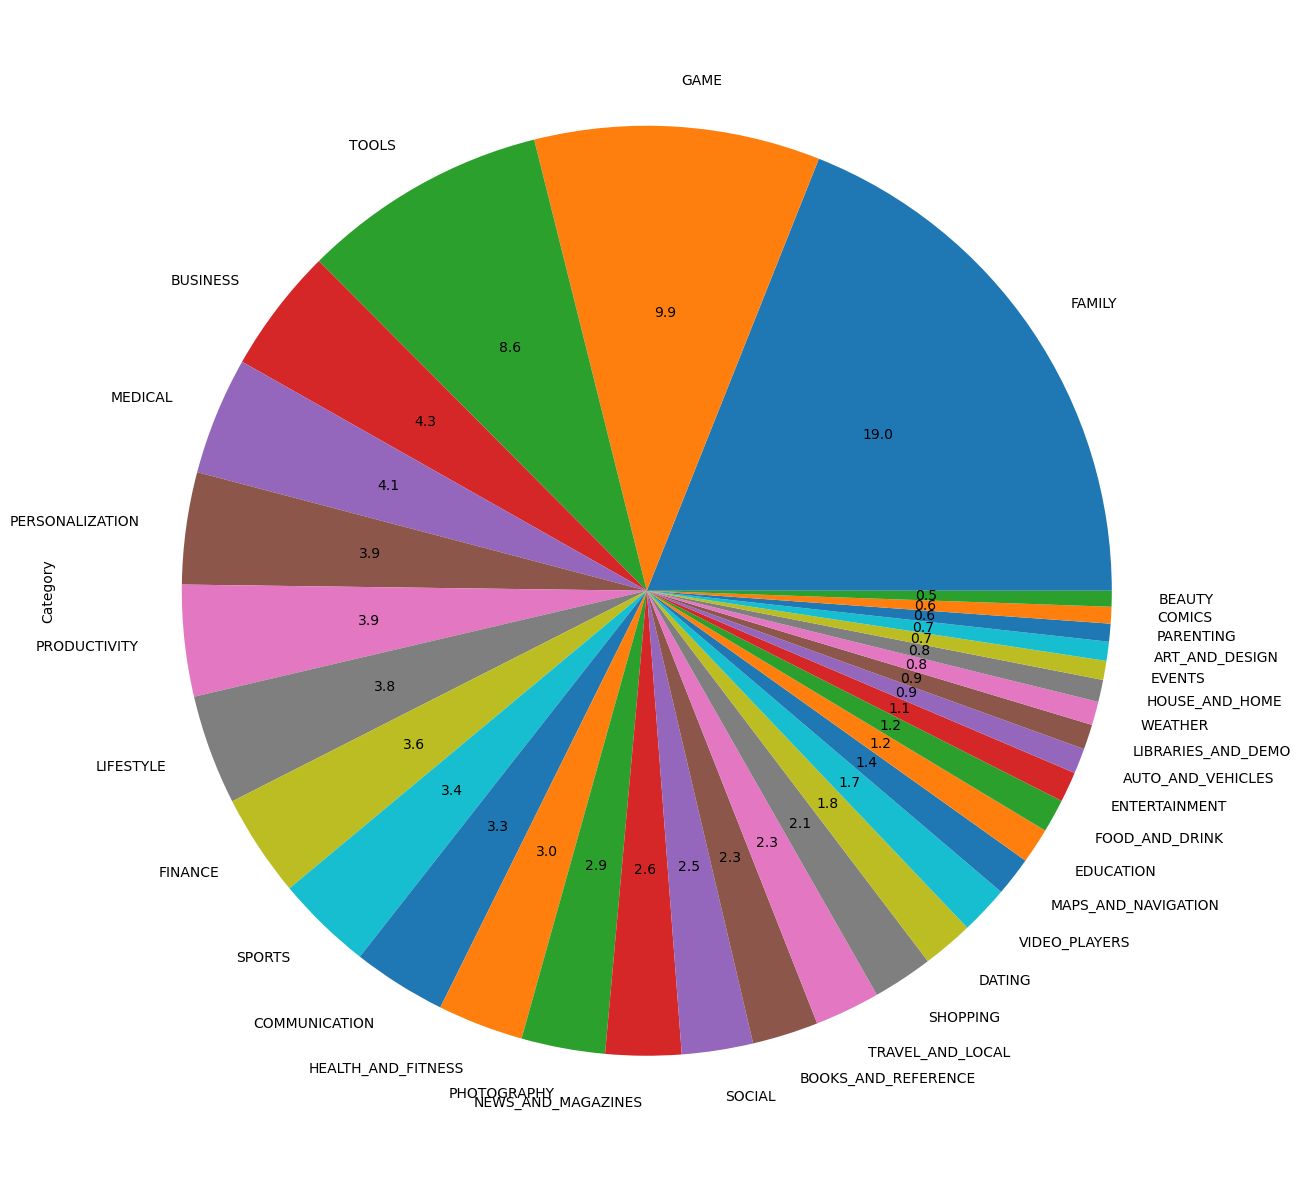

In [55]:
df['Category'].value_counts().plot(kind='pie', figsize=(15,16), autopct = '%1.1f')

## Observation
1. Family is most popular category
2. Second app is Game
3. Third app is Tools

In [56]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: >

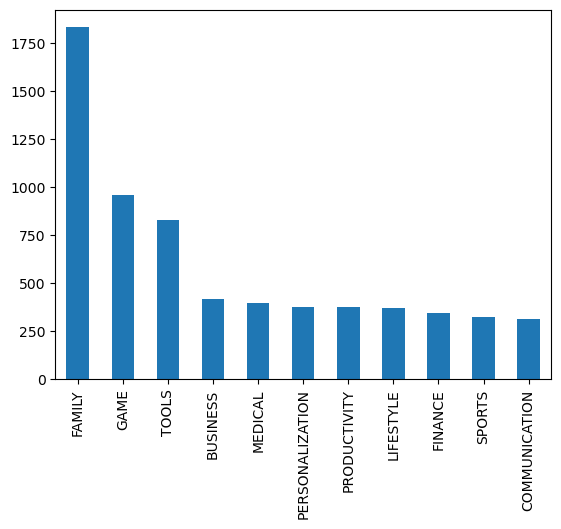

In [63]:
df['Category'].value_counts()[0:11].plot(kind='bar')

## Which Category has largest installation

In [77]:
top_category = df.groupby(by='Category').sum()['Installs'].sort_values(ascending=False).index[0]
top_category

'GAME'

In [79]:
total_installs_top = df.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)[0]
total_installs_top

13878924415.0

## Top 5 Most installed Apps in each popular category

In [95]:
df.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)[0:5]

Category
GAME             1.387892e+10
COMMUNICATION    1.103828e+10
TOOLS            8.001772e+09
PRODUCTIVITY     5.793091e+09
SOCIAL           5.487868e+09
Name: Installs, dtype: float64

In [103]:
top_three_cat = list(df.groupby(by='Category').sum()['Installs'].sort_values(ascending=False)[0:5].index)
top_three_cat

['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

In [108]:
df[df.Category=='GAME'][['App','Installs']].sort_values(by='Installs',ascending=False).head()

,App,Installs
1654,Subway Surfers,1.000000e+09
1655,Candy Crush Saga,5.000000e+08
1661,Temple Run 2,5.000000e+08
1662,Pou,5.000000e+08
1722,My Talking Tom,5.000000e+08


In [110]:
df[df.Category=='FAMILY'][['App','Installs']].sort_values(by='Installs',ascending=False).head()

,App,Installs
6269,Bitmoji – Your Personal Emoji,100000000.0
4229,Where's My Water? Free,100000000.0
4111,Talking Tom Cat 2,100000000.0
6849,Bubble Witch 2 Saga,100000000.0
4329,Tom Loves Angela,100000000.0


In [112]:
df[df.Category=='TOOLS'][['App','Installs']].sort_values(by='Installs',ascending=False).head()

,App,Installs
3234,Google,1.000000e+09
3235,Google Translate,5.000000e+08
4005,Clean Master- Space Cleaner & Antivirus,5.000000e+08
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",5.000000e+08
3265,Gboard - the Google Keyboard,5.000000e+08


## How many apps have 5 star rating?

In [116]:
len(df[df.Reviews==5.0])

108

In [117]:
df[df.Reviews==5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.00,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,17,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.00,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
640,Online Girls Chat Group,DATING,5.0,5,5.0,100.0,Free,0.00,Mature 17+,Dating,2018-08-02,8.2,4.0.3 and up,2,8,2018
684,Teenage Chat & Dating,DATING,3.4,5,14000.0,500.0,Free,0.00,Mature 17+,Dating,2018-07-09,1.2,4.1 and up,9,7,2018
1043,AMM Events & CPD,EVENTS,NaN,5,6.1,100.0,Free,0.00,Everyone,Events,2018-08-04,1.0.5,4.3 and up,4,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10629,Florida Wildflowers,FAMILY,5.0,5,69000.0,1000.0,Free,0.00,Everyone,Education,2017-07-10,1.5,4.1 and up,10,7,2017
10690,FO Bixby,PERSONALIZATION,5.0,5,861.0,100.0,Paid,0.99,Everyone,Personalization,2018-04-25,0.2,7.0 and up,25,4,2018
10695,FO RCBT,COMMUNICATION,NaN,5,15000.0,100.0,Free,0.00,Everyone,Communication,2017-11-15,1.0,4.1 and up,15,11,2017
10703,Fo Fo Fish,GAME,3.4,5,21000.0,50.0,Free,0.00,Everyone,Arcade,2015-08-25,1.0,2.3 and up,25,8,2015
